## Meat consumption trends through the years 
# This project will seek to find trends in the consumption of meat in many countries around the world.
The data been taken from 1961 to 2018 and for many different trends in the way people consume meat. I found many seperate csv files of data surrounding the consumption of meat and I intend to merge them together to be able to correlate the values with each other.
🥅 My Goals:
- To learn to merge together and clean up data from multiple sources to create insightful conclusions about the data
- Create a story through the processing of the data 
- Make some visually appealing graphs using pandas and numpy 

In [2]:
# This will be where add any imports that I may need for my analysis
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from functools import reduce
import csv

import warnings
warnings.filterwarnings('ignore')


I will now read in all the data and begin to look at how I will clean and combine the various datasets

In [3]:
df_gdp = pd.read_csv("data/meat-consumption-vs-gdp-per-capita.csv", index_col=[0])
df_prod = pd.read_csv("data/meat-production-tonnes.csv")
df_supply= pd.read_csv("data/meat-supply-per-person.csv")
df_egg = pd.read_csv("data/per-capita-egg-consumption-kilograms-per-year.csv")
df_milk = pd.read_csv("data/per-capita-milk-consumption.csv")



## Cleaning
Now that the file has been read, I worked to clean the data up and first add in continent names to the data so that I can later group the countries by continent when I want to. Also cleared out all values that were messy or data points that were not relevant or actual countries. 

In [4]:
# Create lists of all countries and territories in each of the continents
asia_countries = ["Afghanistan","Armenia","Azerbaijan","Bahrain","Bangladesh","Bhutan",
"Brunei",'Cambodia','China','Christmas Island','Cocos Islands' ,'Cyprus','Georgia','Hong Kong',
'India','Indonesia'	,'Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea' ,'South Korea',
'Kuwait','Kyrgyzstan','Laos','Lebanon','Macau','Malaysia','Maldives','Mongolia','Burma','Nepal','Oman',
'Pakistan','Palestine','Philippines','Qatar','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan',
'Thailand','East Timor','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen']
africa_countries = ['Algeria', 'Angola', 'Benin','Botswana', 'Burkina Faso','Burundi',
'Cameroon','Cape Verde','Central African Republic',
'Chad','Comoros','Congo','Democratic Republic of Congo',"Cote d'Ivoire",'Djibouti',
'Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea',' Guinea-Bissau',
'Kenya','Lesotho','Liberia','Libya','Madagascar',' Malawi','Mali','Mauritania','Mauritius','Mayotte',
'Morocco','Mozambique','Namibia','Niger',' Nigeria','Réunion','Rwanda','Saint Helena','São Tomé and Príncipe',
'Senegal','Seychelles','Sierra Leone','Somalia','South Africa','Sudan','Swaziland','Tanzania' ,'Togo',
'Tunisia','Uganda','Zambia','Zimbabwe','Western Sahara','Eswatini']
na_countries = ['Canada' ,'Mexico','United States','Anguilla','Antigua and Barbuda','Bahamas','Barbados','Belize','Costa Rica','Dominica',
'Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Nicaragua','Panama','Cuba',
'Sait Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','Bermuda','British Virgin Islands','Cayman Islands'] 
australia_countries = ['Australia','Micronesia','Fiji','Kiribati','Marshall Islands','Nauru',
'New Zealand','Palau','Papua New Guinea', 'Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu', 'American Samoa','Cook Islands','Wallis and Futuna']
europe_countries = ['Albania' ,'Andorra' ,'Armenia' , 'Austria' ,'Azerbaijan' ,'Belarus' ,'Belgium' ,'Bosnia and Herzegovina' ,
'Bulgaria' ,'Croatia' ,'Cyprus' ,'Czechia' ,'Denmark' ,'Estonia' ,'Finland' ,'France' ,'Georgia' ,'Germany' ,
'Greece' ,'Hungary' ,'Iceland' ,'Ireland' ,'Italy' ,'Kazakhstan' ,'Kosovo','Latvia','Liechtenstein',
'Lithuania','Luxembourg' ,'Malta' ,'Moldova' ,'Monaco' ,'Montenegro' ,'Netherlands' ,'North Macedonia' ,
'Norway' ,'Poland' ,'Portugal' ,'Romania' ,'Russia' ,'San Marino' ,'Serbia' ,'Slovakia' ,'Slovenia' ,
'Spain' ,'Sweden' ,'Switzerland' ,'Turkey' ,'Ukraine' ,'United Kingdom' ,'Vatican City','Bouvet Island','Åland Islands']
sa_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 
'Suriname', 'Uruguay', 'Venezuela','Falkland Islands', 'South Georgia', 'South Sandwich Islands', 'French Guiana', 'Aruba',
'Bonaire Sint Eustatius and Saba','Curacao']

I was unable to find a way to organize the countries into continents in an easier way, so I was forced to create a list of all countries/territories that belong to each continent

## Using Mask
Below I used the Mask function to assign each data point to its respective continent by referring to the lists above. Head() allows me to see the first 5 values, where the continent is now Asia.

In [5]:
df_gdp['Continent'].mask(df_gdp['Entity'].isin(asia_countries), "Asia", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity'].isin(europe_countries), "Europe", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity'].isin(australia_countries), "Australia", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity'].isin(na_countries), "North America", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity'].isin(africa_countries), "Africa", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity'].isin(sa_countries), "South America", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity']=="Antarctica", "South America", inplace=True)
df_gdp.head()


,Entity,Code,Year,"Meat food supply quantity (kg/capita/yr) (FAO, 2020)","GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
1,Afghanistan,AFG,1961,14.45,NaN,9169406.0,Asia
2,Afghanistan,AFG,1962,14.46,NaN,9351442.0,Asia
3,Afghanistan,AFG,1963,14.88,NaN,9543200.0,Asia
4,Afghanistan,AFG,1964,15.07,NaN,9744772.0,Asia
5,Afghanistan,AFG,1965,15.38,NaN,9956318.0,Asia


## More dataframe customization
Below I drop all data points that are not correctly formatted or that do not correspond to the values I want to track. 

In [6]:
# I drop all the rows where there is no country code, as there were continents listed that had no real data
df_gdp.dropna(subset = ['Code'], inplace=True)
# Below I drop any rows were the code is > 3 because these aren't real data points
df_gdp.drop(df_gdp[df_gdp['Code'].map(len) > 3].index, inplace=True)
# Below I drop any remaining values that are not assigned a continent as they are not countries or relevant
df_gdp.dropna(subset=['Continent'], inplace=True)
# Below I drop all values with years before 1961 because they are predicted values and do not have corresponding gdp
df_gdp.drop(df_gdp[df_gdp['Year'] < 1961].index, inplace=True)
#df_gdp.drop(df_gdp.columns[0], axis=1, inplace=True)
df_gdp.to_csv('data/updated_gdp.csv', index=False)


## Merging all dataframes 
Below I learned to merge data frames:
- Merged based on certain contraints, in this case based on 'Entity','Code', and 'Year' as this is where all the data frames were the same.
- I used an outer merge so that no one dataframe had priority over the other and all values remained in the final.
- I also went about renaming the columns now that I could change all at the same time
- I saved this merged dataframe to a new df, so that I could see what it looks 

In [7]:
data_frames = [df_gdp, df_prod, df_egg, df_milk]
# Add all the dataframes together, merging my Entity, Code, and year, so that all the values line up correctly
df_merged_all = reduce(lambda  left,right: pd.merge(left,right,on=['Entity','Code','Year'],how='outer'), data_frames)
df_merged_all.rename(columns={'Entity':'Country', 'Population (historical estimates)': 'Population',
'Meat food supply quantity (kg/capita/yr) (FAO, 2020)':'Meat_food_supply_quantity','GDP per capita, PPP (constant 2017 international $)':
'GDP_per_capita','Livestock Primary - Meat, Total - 1765 - Production - 5510 - tonnes':'Livestock_Total_Production',
'Meat food supply quantity (kg/capita/yr) (FAO, 2020)_y':'Meat_food_supply_quantity',
'Eggs - Food supply quantity (kg/capita/yr) (FAO, 2020)':'Eggs_Food_supply_quantity',
'Milk - Excluding Butter - Food supply quantity (kg/capita/yr) (FAO, 2020)':'Milk_Excluding_Butter_Food_supply_quantity'}, inplace=True)
# I drop all the rows where there is no country code, as there were continents listed that had no real data
df_merged_all.dropna(subset = ['Code'], inplace=True)
# Below I drop any rows were the code is > 3 because these aren't real data points
df_merged_all.drop(df_gdp[df_gdp['Code'].map(len) > 3].index, inplace=True)
# Below I drop any remaining values that are not assigned a continent as they are not countries or relevant
df_merged_all.dropna(subset=['Continent'], inplace=True)
# Below I drop all values with years before 1961 because they are predicted values and do not have corresponding gdp
df_merged_all.drop(df_gdp[df_gdp['Year'] < 1961].index, inplace=True)
df_merged_all.to_csv('merged_meat.csv', index=False)
df_merged_all.head()

,Country,Code,Year,Meat_food_supply_quantity,GDP_per_capita,Population,Continent,Livestock_Total_Production,Eggs_Food_supply_quantity,Milk_Excluding_Butter_Food_supply_quantity
0,Afghanistan,AFG,1961,14.45,NaN,9169406.0,Asia,129420.0,0.94,59.30
1,Afghanistan,AFG,1962,14.46,NaN,9351442.0,Asia,132206.0,1.01,58.57
2,Afghanistan,AFG,1963,14.88,NaN,9543200.0,Asia,138971.0,1.04,63.87
3,Afghanistan,AFG,1964,15.07,NaN,9744772.0,Asia,143830.0,1.06,64.05
4,Afghanistan,AFG,1965,15.38,NaN,9956318.0,Asia,150195.0,1.10,68.62


## Initial Graphing
In the next section I will be graphing some preliminary data points to be able to get a sense of the data and ideas for how I will represent the various relationships between the values.

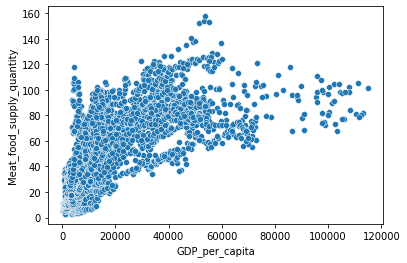

In [8]:
sns.scatterplot(x='GDP_per_capita',y='Meat_food_supply_quantity', data= df_merged_all)
plt.show()

It is cool to see an initial trend in the data!
This however is graphing every single data point, including every single year for each country. While that might be something to explore the trends of in the future, I will first look to graph one single year, and it would make sense to graph the most recent, 2017. 

Now I will work to add labels to the axes.
I will also look to change the size of the circles, based on population of the country.
I will also filter out smaller countries.

In [9]:
# Selecting certain year for the dataframe
df_merged_all_2017 = df_merged_all.loc[df_merged_all['Year'] == 2017]

I have changed the dataframe such that only the year 2017 for all the countries will be plotted

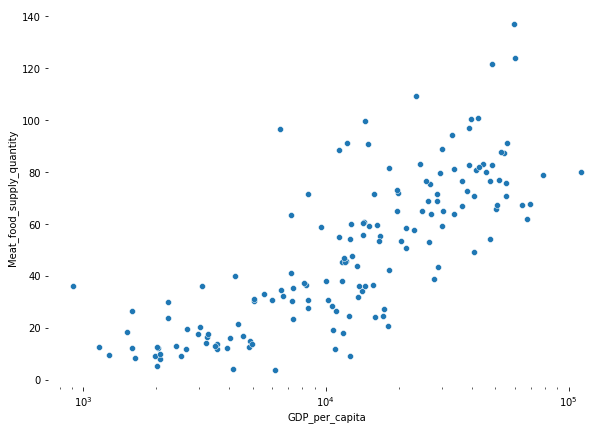

In [10]:
f, ax = plt.subplots(figsize=(10, 7))
sns.despine(f, left=True, bottom=True)
ax.set(xscale='log')
sns.scatterplot(x="GDP_per_capita", y="Meat_food_supply_quantity", data = df_merged_all_2017)
plt.show()          

This is the most general visualization of the data, where each point is on the graph and we can begin to see correlations between GDP and Meat Consumption. From here, I will customize the graph as such:
- Make each point correspond to a color and country name
- change size based on population of each country
- Draw a trend line between the two variables
- Changed scale to log so that data is spread out and makes more sense visually

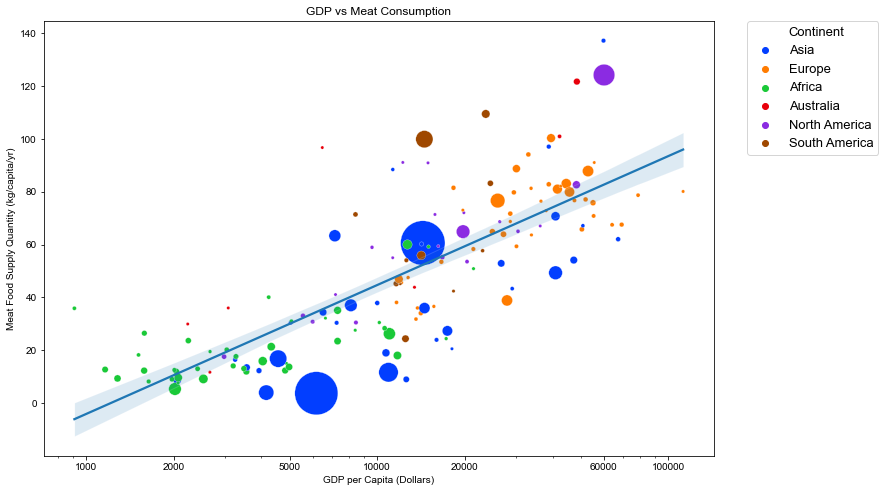

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
plt.rcParams['figure.dpi'] = 300 # Correcting graph image bluriness
plt.rcParams['savefig.dpi'] =300
g = sns.scatterplot(data=df_merged_all_2017,x='GDP_per_capita',y='Meat_food_supply_quantity',
            hue='Continent', size=df_merged_all['Population'], sizes = (10,2000),ax=ax,palette='bright')
h,l = g.get_legend_handles_labels()
plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=13) #So that size was not in the legend I had to slice the legend 
sns.regplot(data=df_merged_all_2017, x='GDP_per_capita',y='Meat_food_supply_quantity', scatter=False, ax=ax, logx= True) # Graphing the trend line, making sure the log scale was noted
sns.set_style('whitegrid')
ax.set_xlabel('GDP per Capita (Dollars)')
ax.set_ylabel('Meat Food Supply Quantity (kg/capita/yr)')
ax.set_xscale('log')
ax.set_title('GDP vs Meat Consumption')
ax.set_xticks([1000,2000,5000,10000,20000,60000,100000]) # Manual xtick markers
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter()) # Reformatting of x-axis
plt.show(g)


That chart looks a lot better than the one before! 
- Color correlates to continent
- Size correlates to Population in 2017
- Regression line has found a linear correlation between the two inputs
- I will look to add some machine learning components to this project


# Further Investigation

### Livestock per Continent ###

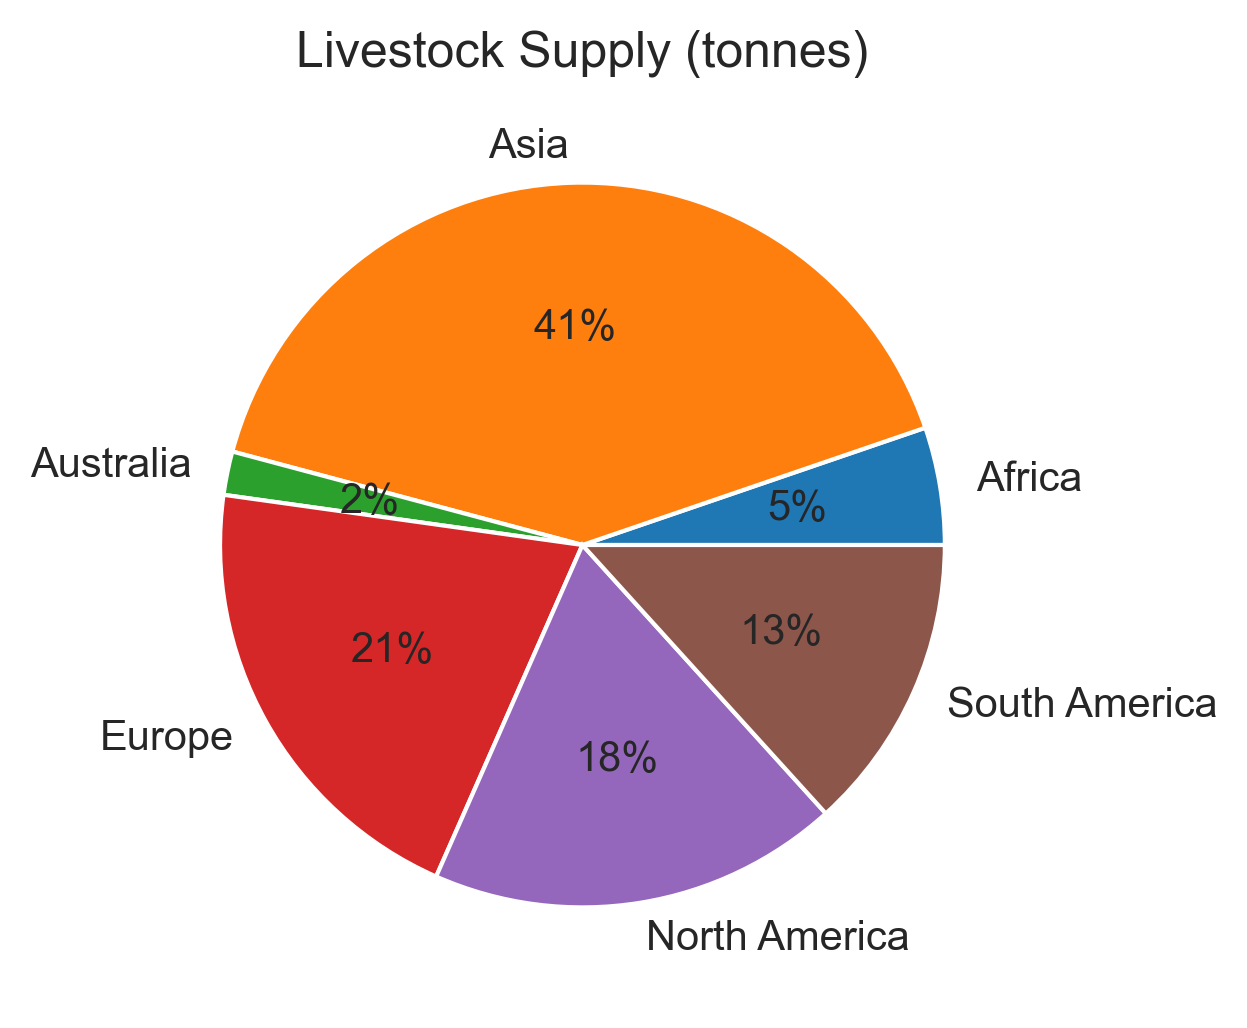

In [12]:
df_merged_all_2017.groupby(['Continent']).sum().plot(kind = 'pie', y = 'Livestock_Total_Production' ,autopct='%1.0f%%', legend = False, ylabel = '', title = 'Livestock Supply (tonnes)');


### Livestock per Continent per Person ###

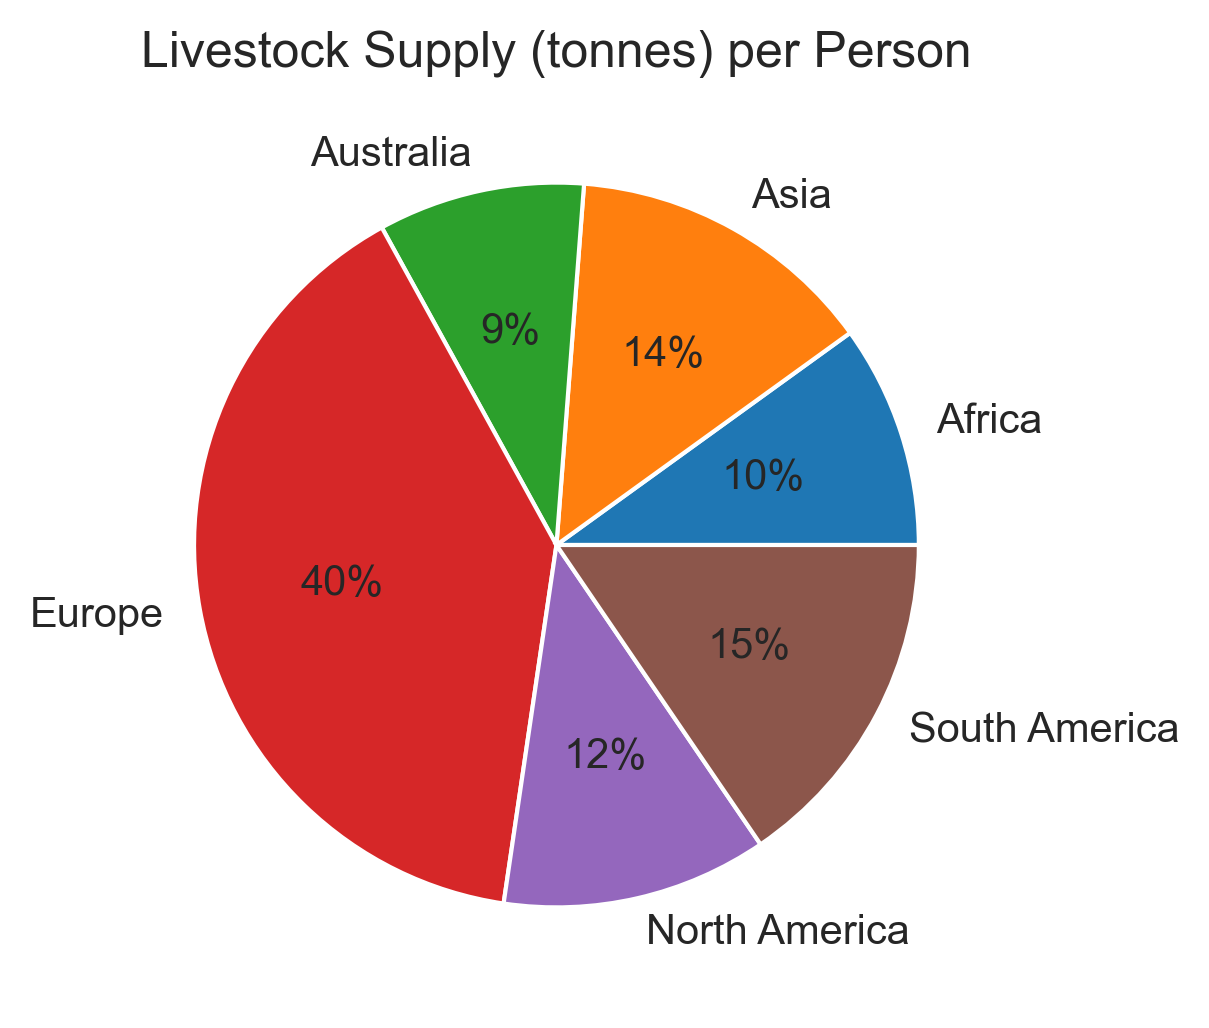

In [13]:
from matplotlib.pyplot import ylabel
df_merged_all_2017['livestock_per_person'] = df_merged_all_2017['Livestock_Total_Production']/df_merged_all_2017['Population']

df_merged_all_2017.groupby(['Continent']).sum().plot(kind = 'pie', y = 'livestock_per_person' ,autopct='%1.0f%%', legend = False, ylabel = '', title = 'Livestock Supply (tonnes) per Person');


While Asia has far more livestock by count than any other continent, the second graph shows that Europe actually has a lot more livestock per person. This was a suprising discovery given that Asia and the US are such large meat suppliers and consumers.

In [14]:
df_merged_all_2017_new = df_merged_all_2017.loc[df_merged_all_2017['Livestock_Total_Production'] > 4000000]

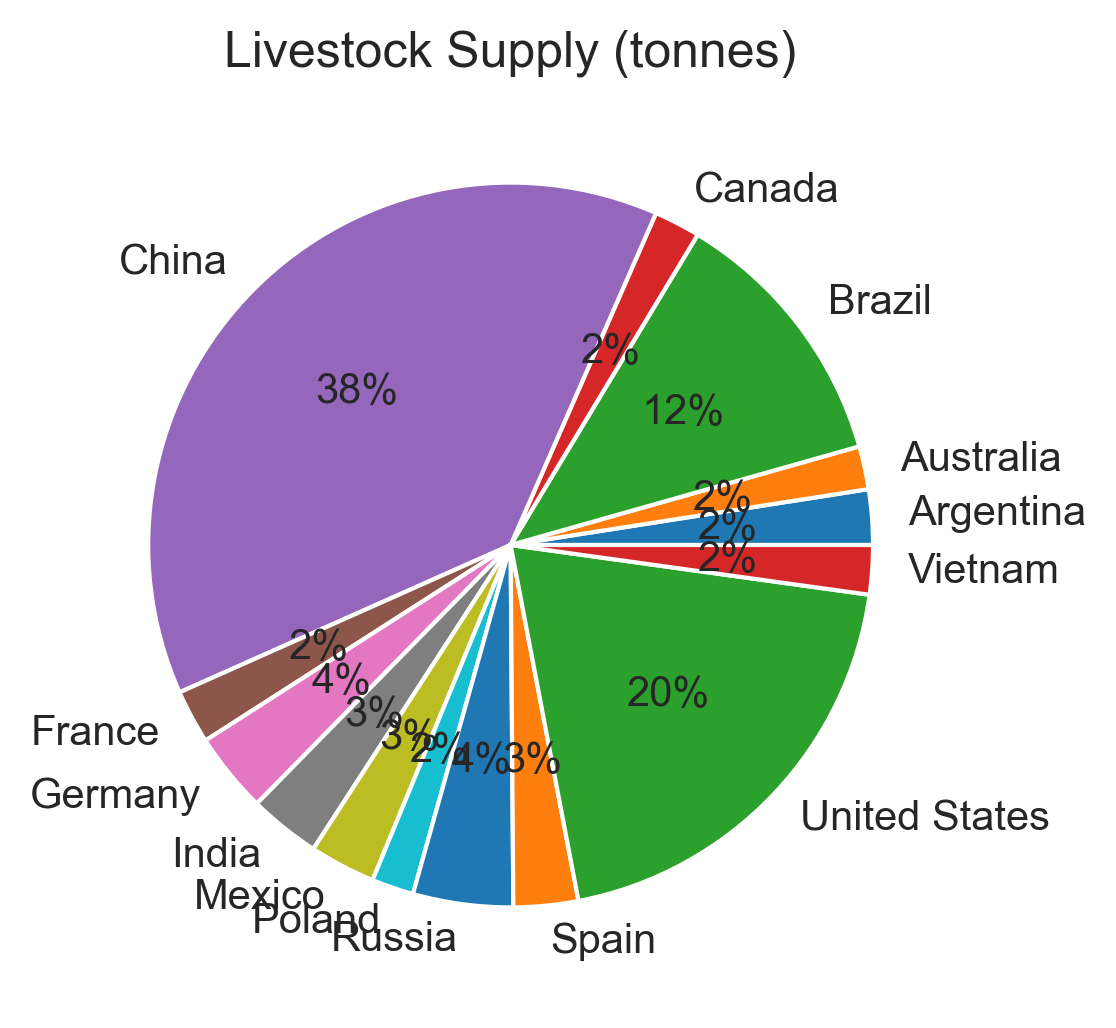

In [15]:
from matplotlib.pyplot import ylabel
df_merged_all_2017_new.groupby(['Country']).sum().plot(kind = 'pie', y = 'Livestock_Total_Production',autopct='%1.0f%%', legend = False, ylabel = '', title = 'Livestock Supply (tonnes)');

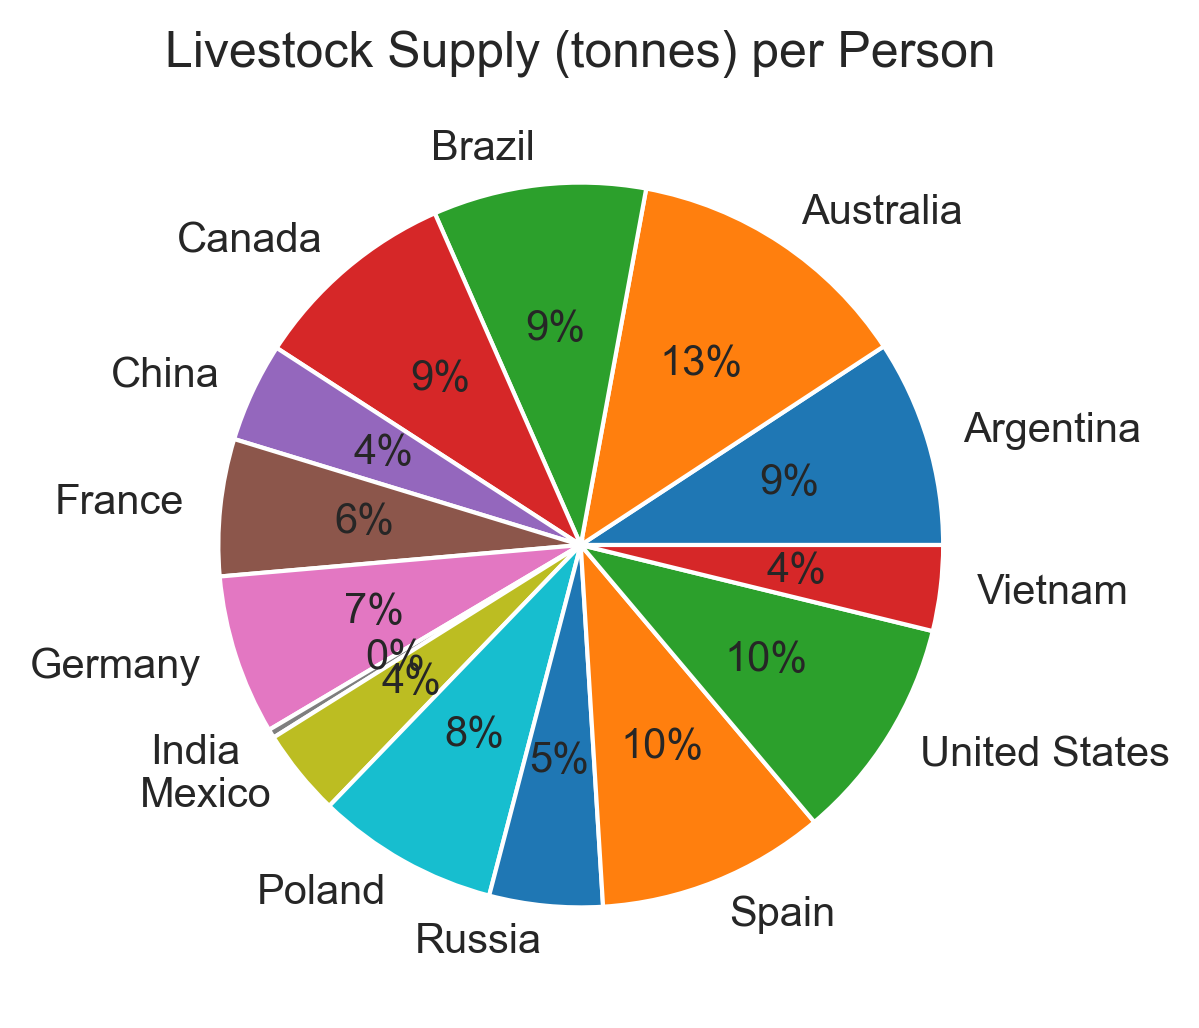

In [16]:
df_merged_all_2017_new['livestock_per_person'] = df_merged_all_2017_new['Livestock_Total_Production']/df_merged_all_2017_new['Population']
df_merged_all_2017_new.groupby(['Country']).sum().plot(kind = 'pie', y = 'livestock_per_person',autopct='%1.0f%%', legend = False, ylabel = '', title = 'Livestock Supply (tonnes) per Person');


Again, when taking population of the countries into account, the distribution changes significantly. 

### Egg Supply ###

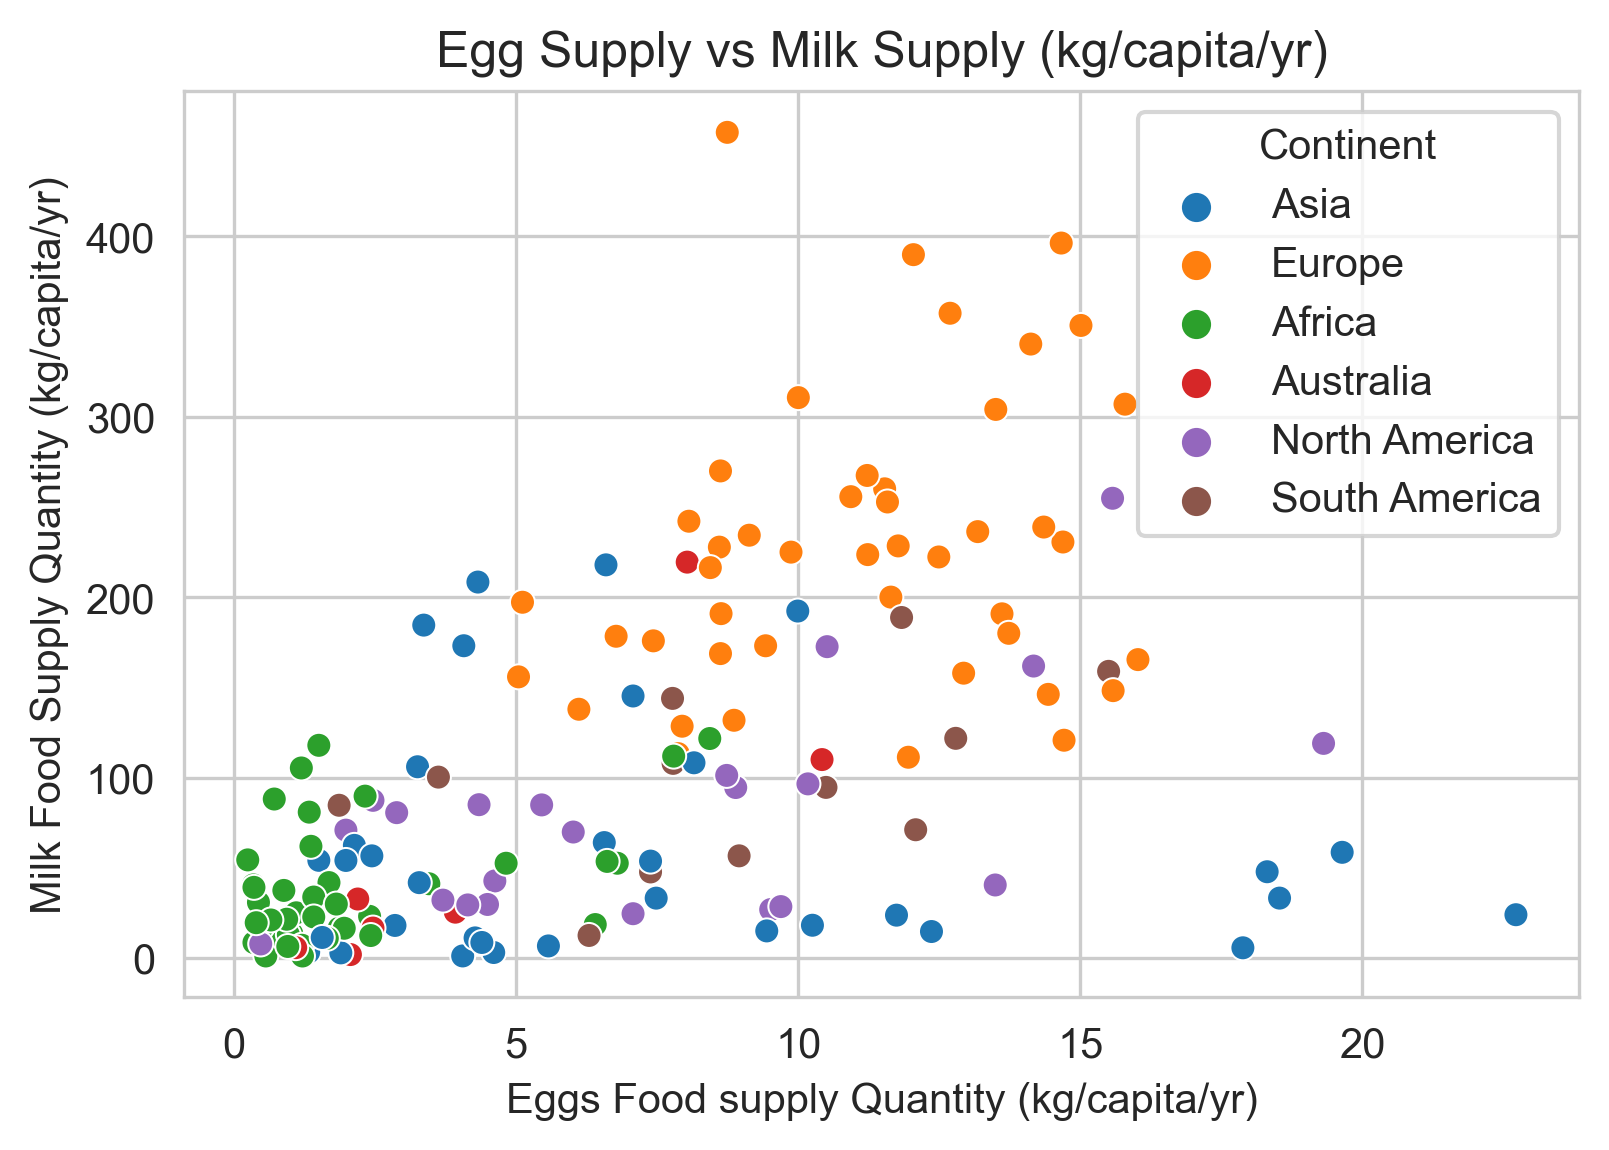

In [17]:
sns.scatterplot(x = 'Eggs_Food_supply_quantity', y = 'Milk_Excluding_Butter_Food_supply_quantity', data = df_merged_all_2017, hue = 'Continent')
plt.ylabel('Milk Food Supply Quantity (kg/capita/yr)')
plt.xlabel('Eggs Food supply Quantity (kg/capita/yr)')
plt.title('Egg Supply vs Milk Supply (kg/capita/yr)')
plt.show();

Some insights from the scatterplot 
- Milk is consumed more than eggs by weight
- In Asia, very little milk is consumed and lots of eggs are consumed
- South America has higher than average egg vs. milk consumption